Correlation between Month Number and Revenue (MYR): 0.73


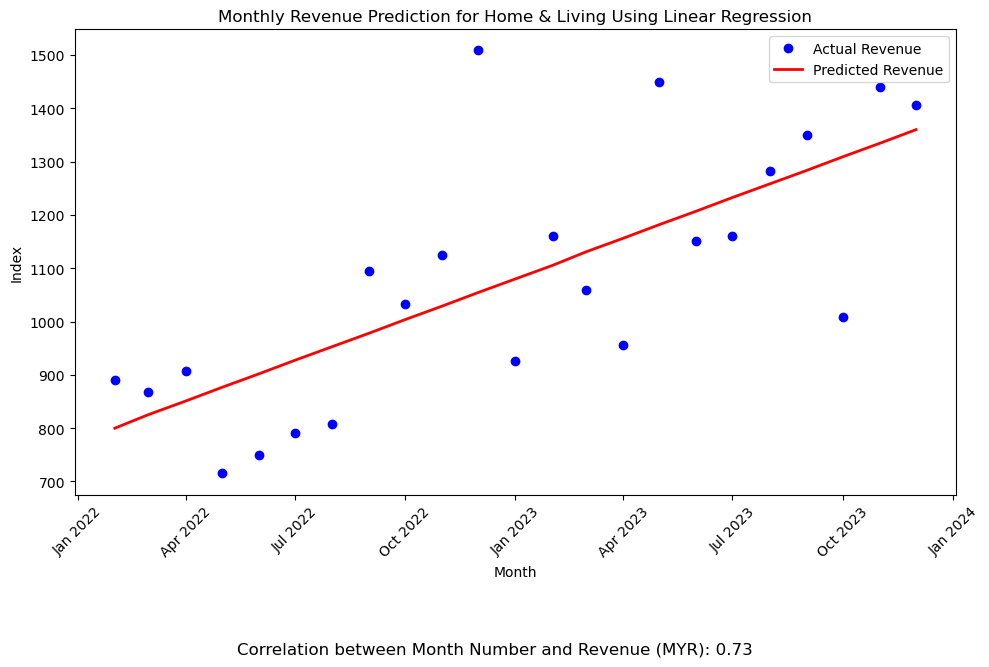

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Define the file path to the CSV file
file_path = 'shopee_sales_report_2022_to_2024.csv'  # Replace with your file path

# Function to calculate the monthly revenue for "Home & Living" category from CSV file
def load_and_preprocess_shopee_data(file_path):
    # Load data from CSV file
    data = pd.read_csv(file_path)

    # Filter for "Home & Living" product category
    data_filtered = data[data['Product Category'] == 'Home & Living'].copy()

    # Convert 'DateTime' to datetime format with dayfirst=True to avoid parsing issues
    data_filtered['DateTime'] = pd.to_datetime(data_filtered['DateTime'], dayfirst=True, errors='coerce')
    
    # Extract month and year, then group by month to calculate total revenue per month
    data_filtered['MonthYear'] = data_filtered['DateTime'].dt.to_period('M')
    grouped_data = data_filtered.groupby('MonthYear')['Revenue (MYR)'].sum().reset_index()
    grouped_data['MonthYear'] = grouped_data['MonthYear'].dt.to_timestamp()  # Convert Period to Timestamp

    return grouped_data

# Load and preprocess the data
grouped_data = load_and_preprocess_shopee_data(file_path)

# Check if data is loaded successfully
if not grouped_data.empty:
    # Prepare the full dataset for modeling
    grouped_data['MonthNumber'] = np.arange(len(grouped_data))  # Numeric month sequence for modeling
    X_full = grouped_data[['MonthNumber']]
    y_full = grouped_data['Revenue (MYR)']

    # Perform correlation testing
    correlation = grouped_data['MonthNumber'].corr(grouped_data['Revenue (MYR)'])
    print(f"Correlation between Month Number and Revenue (MYR): {correlation:.2f}")

    # Train a linear regression model on the dataset
    model = LinearRegression()
    model.fit(X_full, y_full)

    # Generate predictions for the entire period
    predictions_full = model.predict(X_full)

    # Plot the results
    plt.figure(figsize=(10, 6))
    
    # Actual revenue data as dots
    plt.plot(grouped_data['MonthYear'], y_full, 'o', label='Actual Revenue', color='blue')
    
    # Predicted revenue as a continuous line
    plt.plot(grouped_data['MonthYear'], predictions_full, label='Predicted Revenue', color='red', linewidth=2)

    # Add labels and title
    plt.xlabel('Month')
    plt.ylabel('Index')  # Change from 'Revenue (MYR)' to 'Index'
    plt.title('Monthly Revenue Prediction for Home & Living Using Linear Regression')
    plt.legend()
    ax = plt.gca()
    ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Display the correlation value under the graph
    plt.figtext(0.5, -0.1, f"Correlation between Month Number and Revenue (MYR): {correlation:.2f}", ha='center', fontsize=12)

    plt.show()
else:
    print("No data available to build the prediction model.")
